# Import Libraries


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Load the Dataset


In [ ]:
import pandas as pd

# Load CSV directly from content directory
df = pd.read_csv('/content/emails.csv')

print(df.head(20))


                                                 text  spam
0   Subject: naturally irresistible your corporate...     1
1   Subject: the stock trading gunslinger  fanny i...     1
2   Subject: unbelievable new homes made easy  im ...     1
3   Subject: 4 color printing special  request add...     1
4   Subject: do not have money , get software cds ...     1
5   Subject: great nnews  hello , welcome to medzo...     1
6   Subject: here ' s a hot play in motion  homela...     1
7   Subject: save your money buy getting this thin...     1
8   Subject: undeliverable : home based business f...     1
9   Subject: save your money buy getting this thin...     1
10  Subject: las vegas high rise boom  las vegas i...     1
11  Subject: save your money buy getting this thin...     1
12  Subject: brighten those teeth  get your  teeth...     1
13  Subject: wall street phenomenon reaps rewards ...     1
14  Subject: fpa notice : ebay misrepresentation o...     1
15  Subject: search engine position  be 

# Preprocess Data

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Apply to text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Preview result
print(df[['text', 'cleaned_text']].tail(3))

                                                   text  \
5725  Subject: re : enron case study update  wow ! a...   
5726  Subject: re : interest  david ,  please , call...   
5727  Subject: news : aurora 5 . 2 update  aurora ve...   

                                           cleaned_text  
5725  subject enron case study update wow day super ...  
5726  subject interest david please call shirley cre...  
5727  subject news aurora update aurora version fast...  


# Applying TfidfVectorizer

## cleaned email text into numerical vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the cleaned_text column
X_features = vectorizer.fit_transform(df['cleaned_text'])

# Show feature shape
print("Shape of TF-IDF matrix:", X_features.shape)

# Optional: Convert to DataFrame to view some features
tfidf_df = pd.DataFrame(X_features.toarray(), columns=vectorizer.get_feature_names_out())

Shape of TF-IDF matrix: (5728, 1000)
   ability  able  academic  access  account  accounting  across  act  action  \
0      0.0   0.0       0.0     0.0      0.0         0.0     0.0  0.0     0.0   
1      0.0   0.0       0.0     0.0      0.0         0.0     0.0  0.0     0.0   
2      0.0   0.0       0.0     0.0      0.0         0.0     0.0  0.0     0.0   
3      0.0   0.0       0.0     0.0      0.0         0.0     0.0  0.0     0.0   
4      0.0   0.0       0.0     0.0      0.0         0.0     0.0  0.0     0.0   

   activity  ...  writing  wrote  www  yahoo  year       yes  yesterday  \
0       0.0  ...      0.0    0.0  0.0    0.0   0.0  0.000000        0.0   
1       0.0  ...      0.0    0.0  0.0    0.0   0.0  0.659521        0.0   
2       0.0  ...      0.0    0.0  0.0    0.0   0.0  0.000000        0.0   
3       0.0  ...      0.0    0.0  0.0    0.0   0.0  0.000000        0.0   
4       0.0  ...      0.0    0.0  0.0    0.0   0.0  0.000000        0.0   

        yet  york  zimin  
0  0

## Apply train_test_split to Feature Matrix and Labels

In [ ]:
from sklearn.model_selection import train_test_split

# X is the TF-IDF feature matrix
X = X_features

# y is the target variable (spam)
y = df['spam']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (4582, 1000)
Test set shape: (1146, 1000)


## Train All Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC  # Faster and works with sparse data
from sklearn.metrics import classification_report

# Dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (LinearSVC)": LinearSVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"📊 Evaluation: {name}")
    print(classification_report(y_test, y_pred))



🔹 Training: Logistic Regression
📊 Evaluation: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       872
           1       0.97      0.95      0.96       274

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146


🔹 Training: Multinomial Naive Bayes
📊 Evaluation: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       872
           1       0.95      0.94      0.94       274

    accuracy                           0.97      1146
   macro avg       0.97      0.96      0.96      1146
weighted avg       0.97      0.97      0.97      1146


🔹 Training: Random Forest
📊 Evaluation: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       872
           1       0.97      0.95      0


📌 Evaluation for: Logistic Regression
✅ Accuracy: 0.9799
✅ Precision: 0.9700
✅ Recall: 0.9453
✅ F1 Score: 0.9575


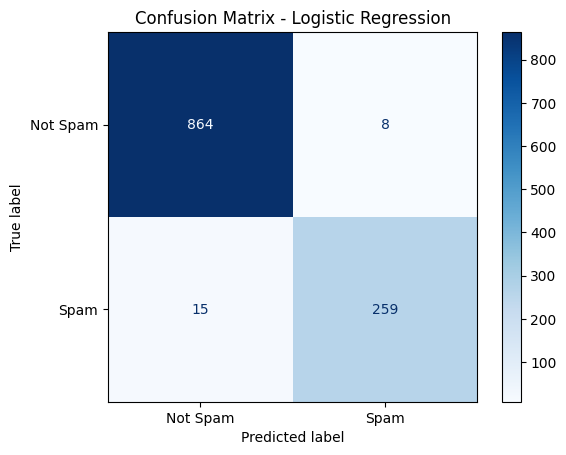


📌 Evaluation for: Multinomial Naive Bayes
✅ Accuracy: 0.9738
✅ Precision: 0.9519
✅ Recall: 0.9380
✅ F1 Score: 0.9449


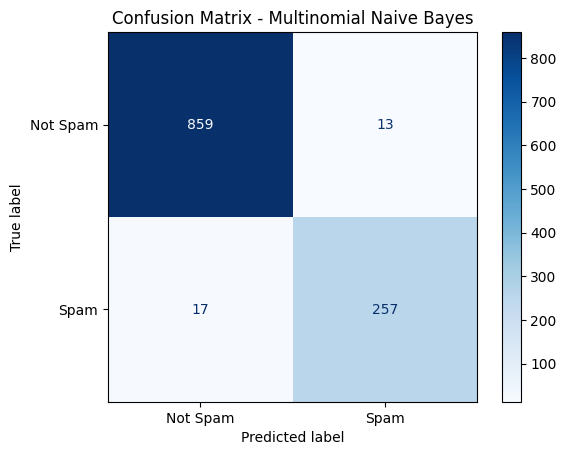


📌 Evaluation for: Random Forest
✅ Accuracy: 0.9808
✅ Precision: 0.9737
✅ Recall: 0.9453
✅ F1 Score: 0.9593


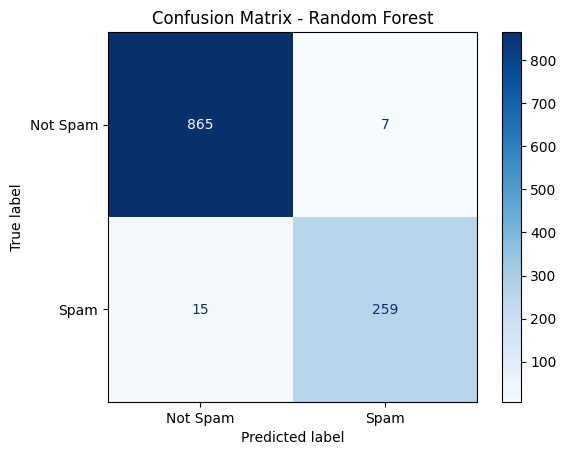


📌 Evaluation for: SVM (LinearSVC)
✅ Accuracy: 0.9852
✅ Precision: 0.9673
✅ Recall: 0.9708
✅ F1 Score: 0.9690


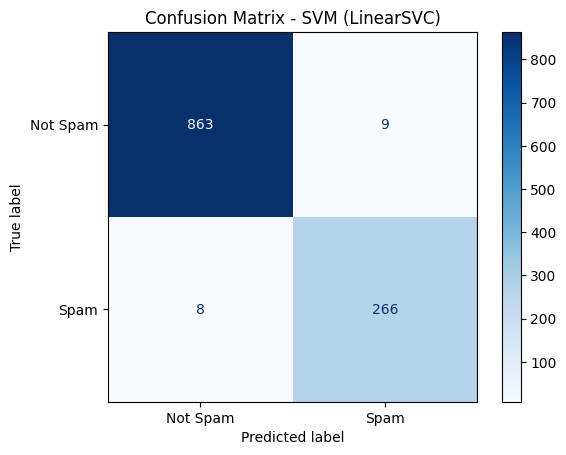

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reuse trained models from before
for name, model in models.items():
    print(f"\n📌 Evaluation for: {name}")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f}")
    print(f"✅ Recall: {rec:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
